In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
import numpy as np

In [2]:
### Read dataframes
df_2r_c_AB_2015= pd.read_pickle('imerg_pkl/df_2r_c_AB_2015.pkl')
df_2r_c_AB_2016= pd.read_pickle('imerg_pkl/df_2r_c_AB_2016.pkl')
df_2r_c_AB_2017= pd.read_pickle('imerg_pkl/df_2r_c_AB_2017.pkl')
df_2r_c_AB_2018= pd.read_pickle('imerg_pkl/df_2r_c_AB_2018.pkl')
df_2r_c_AB_2019= pd.read_pickle('imerg_pkl/df_2r_c_AB_2019.pkl')
df_2r_c_AB_2020= pd.read_pickle('imerg_pkl/df_2r_c_AB_2020.pkl')

df_2r_c_SESA_2015= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2015.pkl')
df_2r_c_SESA_2016= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2016.pkl')
df_2r_c_SESA_2017= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2017.pkl')
df_2r_c_SESA_2018= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2018.pkl')
df_2r_c_SESA_2019= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2019.pkl')
df_2r_c_SESA_2020= pd.read_pickle('imerg_pkl/df_2r_c_SESA_2020.pkl')

In [3]:
# Define common properties
lw = 1.5
errorbar_propsss = {'fmt': 'none', 'ecolor': 'saddlebrown', 'capsize': 3}

In [4]:
#### Functions to plot

def bootstrap_error(data, bins, n_samples):
    samples = np.random.choice(data, (n_samples, len(data)), replace=True)
    histograms = [np.histogram(sample, bins=bins)[0] for sample in samples]
    percentual_frequencies = [100*hist / hist.sum() for hist in histograms]
    return percentual_frequencies

def get_hist(df, bins):
    hist, _ = np.histogram(df, bins)
    percent = [100*i/sum(hist) for i in hist]
    return percent

# Define a function to set the y-limits, y-scale, and title
def set_plot_props(ax, title,yi=6,yf=49, log=True):
    if log==True:
        ax.set_yscale('log'); 
    ax.set_ylim(yi, yf); ax.set_title(title); ax.set_xlabel('Frequency [%]')
    

# Define a function to add horizontal lines for the quantiles
def add_quantile_lines(ax, df, color, column='mean_tqv',qs=[0.25, 0.5, 0.75]):
    quantiles = qs;    
    for q in quantiles:
        y_coord = df.quantile(q)[column]
        ax.axhline(y=y_coord, color=color, ls='--', lw=0.8)

### Slicing objects within the domain box and whose duration considers at least "t_i" and "t_m" stages

In [5]:
### Define subregions representative of Amazon and SESA

df_env_obs_AB_2015 = df_2r_c_AB_2015[(df_2r_c_AB_2015.latitude<3)&(df_2r_c_AB_2015.latitude>-7)&(
    df_2r_c_AB_2015.longitude>-73)&(df_2r_c_AB_2015.longitude<-58)]
df_env_obs_AB_2016 = df_2r_c_AB_2016[(df_2r_c_AB_2016.latitude<3)&(df_2r_c_AB_2016.latitude>-7)&(
    df_2r_c_AB_2016.longitude>-73)&(df_2r_c_AB_2016.longitude<-58)]
df_env_obs_AB_2017 = df_2r_c_AB_2017[(df_2r_c_AB_2017.latitude<3)&(df_2r_c_AB_2017.latitude>-7)&(
    df_2r_c_AB_2017.longitude>-73)&(df_2r_c_AB_2017.longitude<-58)]
df_env_obs_AB_2018 = df_2r_c_AB_2018[(df_2r_c_AB_2018.latitude<3)&(df_2r_c_AB_2018.latitude>-7)&(
    df_2r_c_AB_2018.longitude>-73)&(df_2r_c_AB_2018.longitude<-58)]
df_env_obs_AB_2019 = df_2r_c_AB_2019[(df_2r_c_AB_2019.latitude<3)&(df_2r_c_AB_2019.latitude>-7)&(
    df_2r_c_AB_2019.longitude>-73)&(df_2r_c_AB_2019.longitude<-58)]
df_env_obs_AB_2020 = df_2r_c_AB_2020[(df_2r_c_AB_2020.latitude<3)&(df_2r_c_AB_2020.latitude>-7)&(
    df_2r_c_AB_2020.longitude>-73)&(df_2r_c_AB_2020.longitude<-58)]

df_env_obs_SESA_2015 = df_2r_c_SESA_2015[(df_2r_c_SESA_2015.latitude<=-14)&(df_2r_c_SESA_2015.latitude>=-24)&(
    df_2r_c_SESA_2015.longitude>=-65)&(df_2r_c_SESA_2015.longitude<=-50)]
df_env_obs_SESA_2016 = df_2r_c_SESA_2016[(df_2r_c_SESA_2016.latitude<=-14)&(df_2r_c_SESA_2016.latitude>=-24)&(
    df_2r_c_SESA_2016.longitude>=-65)&(df_2r_c_SESA_2016.longitude<=-50)]
df_env_obs_SESA_2017 = df_2r_c_SESA_2017[(df_2r_c_SESA_2017.latitude<=-14)&(df_2r_c_SESA_2017.latitude>=-24)&(
    df_2r_c_SESA_2017.longitude>=-65)&(df_2r_c_SESA_2017.longitude<=-50)]
df_env_obs_SESA_2018 = df_2r_c_SESA_2018[(df_2r_c_SESA_2018.latitude<=-14)&(df_2r_c_SESA_2018.latitude>=-24)&(
    df_2r_c_SESA_2018.longitude>=-65)&(df_2r_c_SESA_2018.longitude<=-50)]
df_env_obs_SESA_2019 = df_2r_c_SESA_2019[(df_2r_c_SESA_2019.latitude<=-14)&(df_2r_c_SESA_2019.latitude>=-24)&(
    df_2r_c_SESA_2019.longitude>=-65)&(df_2r_c_SESA_2019.longitude<=-50)]
df_env_obs_SESA_2020 = df_2r_c_SESA_2020[(df_2r_c_SESA_2020.latitude<=-14)&(df_2r_c_SESA_2020.latitude>=-24)&(
    df_2r_c_SESA_2020.longitude>=-65)&(df_2r_c_SESA_2020.longitude<=-50)]

In [6]:
###Make sure dataframes contain at least both "t_i" and "t_m" stages

# Group by "cell" and filter for groups that have at least both "t_i" and "t_m" stages
dfilt_env_AB_2015 = df_env_obs_AB_2015.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_2016 = df_env_obs_AB_2016.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_2017 = df_env_obs_AB_2017.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_2018 = df_env_obs_AB_2018.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_2019 = df_env_obs_AB_2019.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_AB_2020 = df_env_obs_AB_2020.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)


dfilt_env_SESA_2015 = df_env_obs_SESA_2015.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_2016 = df_env_obs_SESA_2016.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_2017 = df_env_obs_SESA_2017.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_2018 = df_env_obs_SESA_2018.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_2019 = df_env_obs_SESA_2019.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)
dfilt_env_SESA_2020 = df_env_obs_SESA_2020.groupby('cell').filter(
    lambda x: 't_i' in x['stage'].values and 't_m' in x['stage'].values)

In [7]:
## Merge all dataframes

######################## AMAZON ########################

merged_df_imerg_ab = pd.concat([dfilt_env_AB_2015.reset_index(drop=True),dfilt_env_AB_2016.reset_index(drop=True),
                         dfilt_env_AB_2017.reset_index(drop=True),dfilt_env_AB_2018.reset_index(drop=True),
                         dfilt_env_AB_2019.reset_index(drop=True),dfilt_env_AB_2020.reset_index(drop=True)],axis=0, ignore_index=True)
# Reset the index of the concatenated dataframe
merged_df_imerg_ab.reset_index(drop=True, inplace=True)


######################## SESA ########################
merged_df_imerg_SESA = pd.concat([dfilt_env_SESA_2015.reset_index(drop=True),dfilt_env_SESA_2016.reset_index(drop=True),
                         dfilt_env_SESA_2017.reset_index(drop=True),dfilt_env_SESA_2018.reset_index(drop=True),
                         dfilt_env_SESA_2019.reset_index(drop=True),dfilt_env_SESA_2020.reset_index(drop=True)],axis=0, ignore_index=True)
# Reset the index of the concatenated dataframe
merged_df_imerg_SESA.reset_index(drop=True, inplace=True)


In [8]:
merged_df_imerg_ab['max_prec'] = pd.to_numeric(merged_df_imerg_ab['max_prec'],errors = 'coerce');
merged_df_imerg_SESA['max_prec'] = pd.to_numeric(merged_df_imerg_SESA['max_prec'],errors = 'coerce');

In [9]:
from scipy.stats import mannwhitneyu

In [10]:
def write_significance(data_low, data_high):   
    stat, p = mannwhitneyu(data_low, data_high)
    
    return(p)

### Fig 4 and 5 (Observations: Contrasting system size distributions in high - low SM regimes) 

In [11]:
outplot = '/scratch/wcq7pz/output_plots/'

In [14]:
def plot_by_regime(axs,dc1,var_x='SM_std_env',var_y='area_ob',bins='',colors='saddlebrown',label_high='high SM_std',
                   label_low='low SM_std',error_prop=errorbar_propsss):
    mid_bins = 0.5*(bins[1:]+bins[:-1]); sample =1000;
    p1_high = get_hist(dc1[(dc1[var_x]>dc1[var_x].quantile(.5))&(dc1[var_x]<dc1[var_x].quantile(.9))][var_y],bins);
    p1_low  = get_hist(dc1[(dc1[var_x]<dc1[var_x].quantile(.5))&(dc1[var_x]>dc1[var_x].quantile(.1))][var_y],bins);
    axs.plot( p1_high, mid_bins, label=label_high, color=colors, linewidth=lw);
    axs.plot( p1_low, mid_bins, label=label_low,  color=colors, linewidth=lw,ls='--');
    axs.errorbar(p1_high, mid_bins,xerr= np.std(bootstrap_error(dc1[(dc1[var_x]>dc1[var_x].quantile(.5))&(dc1[var_x]<dc1[var_x].quantile(.9))][var_y], bins, sample), axis=0), **error_prop)
    axs.errorbar(p1_low, mid_bins, xerr= np.std(bootstrap_error(dc1[(dc1[var_x]<dc1[var_x].quantile(.5))&(dc1[var_x]>dc1[var_x].quantile(.1))][var_y], bins, sample), axis=0), **error_prop)
    # Compute p-value
    p_value = write_significance(dc1[(dc1[var_x] > dc1[var_x].quantile(0.5)) & (dc1[var_x] < dc1[var_x].quantile(0.9))][var_y],
                                 dc1[(dc1[var_x] < dc1[var_x].quantile(0.5)) & (dc1[var_x] > dc1[var_x].quantile(0.1))][var_y])

    # Annotate p-value with decimal format
    axs.annotate(f'p = {p_value:.3f}', xy=(0.5, 0.8), xycoords='axes fraction', fontsize=8, 
                 verticalalignment='top', horizontalalignment='left',alpha=0.5)

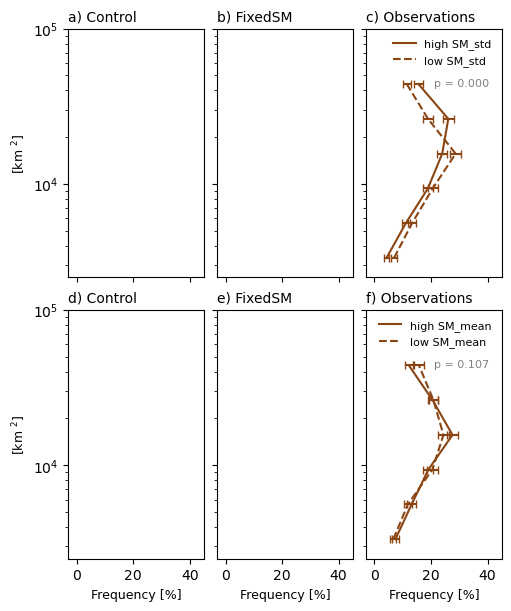

In [15]:
bingS = (np.logspace(np.log10(2500),np.log10(5.5e4),7));  var_x='SM_std_env';var_y='area_ob';

dc1_ab = (merged_df_imerg_ab[(merged_df_imerg_ab.topo_median<500)&(merged_df_imerg_ab.topo_std<150)]); 

f, axs = plt.subplots(2, 3, figsize=(5, 6),layout='constrained',sharey=True,sharex=True);
plot_by_regime(axs[0,2],dc1_ab, bins=bingS);
plot_by_regime(axs[1,2],dc1_ab,var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean',bins=bingS);

axs[0,2].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,2].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,0].set_yscale('log'); axs[0,0].set_ylim(2500,1e5);  axs[0,0].set_xlim(-3,45)

axs[0,0].set_title('a) Control',fontsize=10, loc='left'); axs[0,1].set_title('b) FixedSM',fontsize=10, loc='left'); axs[0,2].set_title('c) Observations',fontsize=10, loc='left');  
axs[1,0].set_title('d) Control',fontsize=10, loc='left'); axs[1,1].set_title('e) FixedSM',fontsize=10, loc='left'); axs[1,2].set_title('f) Observations',fontsize=10, loc='left');  
axs[0,0].set_ylabel('[km $^{2}$]',fontsize=9); axs[1,0].set_ylabel('[km $^{2}$]',fontsize=9); 
axs[1,0].set_xlabel('Frequency [%]',fontsize=9); axs[1,1].set_xlabel('Frequency [%]',fontsize=9); axs[1,2].set_xlabel('Frequency [%]',fontsize=9); 


plt.savefig(outplot+"figure4_observations.pdf", format="pdf",dpi=300,  bbox_inches="tight")

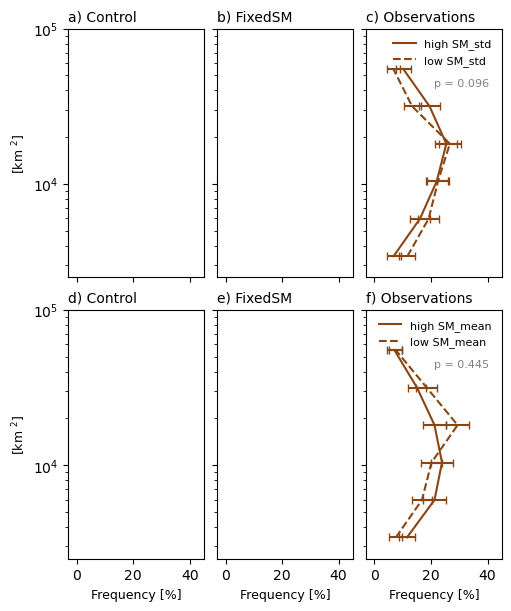

In [16]:
bingS = (np.logspace(np.log10(2500),np.log10(7e4),7));  var_x='SM_std_env';var_y='area_ob';

dc1_ab = merged_df_imerg_SESA[(merged_df_imerg_SESA.topo_median<500)&(merged_df_imerg_SESA.topo_std<150)]; 

f, axs = plt.subplots(2, 3, figsize=(5, 6),layout='constrained',sharey=True,sharex=True);
plot_by_regime(axs[0,2],dc1_ab, bins=bingS);
plot_by_regime(axs[1,2],dc1_ab, var_x='SM_mean_env',label_high= 'high SM_mean', label_low='low SM_mean', bins=bingS);

axs[0,2].legend(fontsize=8, frameon=False, loc='upper right'); axs[1,2].legend(fontsize=8, frameon=False, loc='upper right');
axs[0,0].set_yscale('log'); axs[0,0].set_ylim(2500,1e5);  axs[0,0].set_xlim(-3,45)

axs[0,0].set_title('a) Control',fontsize=10, loc='left'); axs[0,1].set_title('b) FixedSM',fontsize=10, loc='left'); axs[0,2].set_title('c) Observations',fontsize=10, loc='left');  
axs[1,0].set_title('d) Control',fontsize=10, loc='left'); axs[1,1].set_title('e) FixedSM',fontsize=10, loc='left'); axs[1,2].set_title('f) Observations',fontsize=10, loc='left');  
axs[0,0].set_ylabel('[km $^{2}$]',fontsize=9); axs[1,0].set_ylabel('[km $^{2}$]',fontsize=9); 
axs[1,0].set_xlabel('Frequency [%]',fontsize=9); axs[1,1].set_xlabel('Frequency [%]',fontsize=9); axs[1,2].set_xlabel('Frequency [%]',fontsize=9); 


plt.savefig(outplot+"figure5_observations.pdf", format="pdf",dpi=300,  bbox_inches="tight")